In [1]:
import sys
import matplotlib.pyplot as plt

In [2]:
# Control consoles only
#sys.path.insert(1,'N:\\ControlRoom\\nkuklev\\Software')
import pyIOTA.acnet as acnet
import pyIOTA.iota as iota

[INFO    ] csr.py: module PYFFTW is not installed. Install it to speed up calculation.


initializing ocelot...
import: module PYFFTW is not installed. Install it to speed up calculation


In [3]:
# Query all horizontal BPMS
devices = iota.BPMS.HA
ds = acnet.frontends.BPMDeviceSet(name='bpms', members=devices,
                                  adapter = acnet.frontends.ACL(), 
                                  enforce_array_length=1000)
ds.read() # returns number of successfully read devices

21

In [4]:
# Device set stores all device objects in dictionary based on ACNET names
bpms = ds.devices
for (k,v) in bpms.items():
    print(f'{k} | {v}')

N:IBB2RH | BPMDevice N:IBB2RH:[ 8.00e+00  4.10e-03  7.05e-02 -8.33e-02]...
N:IBC1RH | BPMDevice N:IBC1RH:[8.    2.078 2.152 1.974]...
N:IBC2RH | BPMDevice N:IBC2RH:[8.     0.1141 0.1446 0.1432]...
N:IBD1RH | BPMDevice N:IBD1RH:[8.     0.5132 0.3478 0.3446]...
N:IBD2RH | BPMDevice N:IBD2RH:[8.     0.0813 0.1438 0.1556]...
N:IBE1RH | BPMDevice N:IBE1RH:[8.     0.1463 0.1259 0.058 ]...
N:IBE2RH | BPMDevice N:IBE2RH:[   8. 1000. 1000. 1000.]...
N:IBE2LH | BPMDevice N:IBE2LH:[8.     0.6958 0.5937 0.6779]...
N:IBE1LH | BPMDevice N:IBE1LH:[8.    2.081 2.092 2.104]...
N:IBD2LH | BPMDevice N:IBD2LH:[ 8.     -0.9292 -1.014  -0.9118]...
N:IBD1LH | BPMDevice N:IBD1LH:[ 8.    -1.1   -1.108 -1.179]...
N:IBC2LH | BPMDevice N:IBC2LH:[ 8.     -0.3274 -0.3741 -0.3202]...
N:IBC1LH | BPMDevice N:IBC1LH:[8.     0.7958 0.86   0.6613]...
N:IBB2LH | BPMDevice N:IBB2LH:[ 8.     -0.8924 -0.9619 -0.8432]...
N:IBB1LH | BPMDevice N:IBB1LH:[ 8.     -0.4074 -0.3758 -0.4084]...
N:IBA3LH | BPMDevice N:IBA3LH:[8.     0

In [5]:
# You can access device set as a dictionary directly
bpm = ds['N:IBC2RH']
type(bpm)

pyIOTA.acnet.frontends.BPMDevice

In [6]:
# Only the desired array length is requested from server
len(bpm.value)

1000

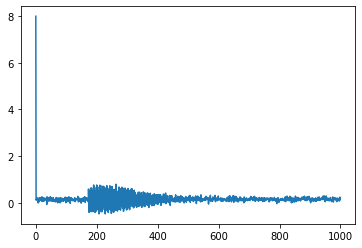

In [7]:
plt.plot(bpm.value)